<a href="https://colab.research.google.com/github/iqbalamo93/Clustering/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
url='https://dsserver-prod-resources-1.s3.amazonaws.com/26/114_congress.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
votes = pd.read_csv(url)

In [4]:
print(votes["party"].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


In [5]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [6]:
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[1,3:].values.reshape(1, -1)))
distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[2,3:].values.reshape(1, -1))

[[1.73205081]]


In [7]:
distance

array([[3.31662479]])

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])

In [9]:
senator_distances[:5]# Two clomns as we specified two clusters, 1st is distance from other cluster,other from cluster

array([[1.3134775 , 3.12141628],
       [2.05339992, 2.6146248 ],
       [3.41651746, 0.33960656],
       [0.24198446, 3.42004795],
       [2.96866004, 1.43833966]])

In [0]:
labels = kmeans_model.labels_

In [11]:
labels

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

In [12]:
pd.crosstab(labels, votes["party"])

party,D,I,R
row_0,,,
0,3,0,54
1,41,2,0


In [13]:
votes["party"].shape,labels.shape

((100,), (100,))

In [0]:
democratic_outliers = votes[(labels == 0) & (votes["party"] == "D")]

In [15]:
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


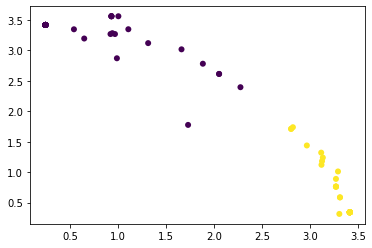

In [48]:
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels, linewidths=0)
plt.show()

In [0]:
extremes = senator_distances

In [24]:
extremes.shape,np.sum(extremes,axis=1).sum()

((100, 2), 390.740294476682)

In [23]:
np.sum(extremes,axis=1).shape

(100,)

In [0]:
extremes = (extremes**3).sum(axis=1)

In [0]:
votes["extremism"] = extremes

In [30]:
votes.sort_values("extremism", inplace=True, ascending=False)
print(votes.head(10))

         name party state  00001  00004  ...  00038  00039  00044  00047  extremism
98     Wicker     R    MS    0.0    1.0  ...    0.0    1.0    0.0    0.0  46.250476
53   Lankford     R    OK    0.0    1.0  ...    0.0    1.0    0.0    0.0  46.046873
69       Paul     R    KY    0.0    1.0  ...    0.0    1.0    0.0    0.0  46.046873
80      Sasse     R    NE    0.0    1.0  ...    0.0    1.0    0.0    0.0  46.046873
26       Cruz     R    TX    0.0    1.0  ...    0.0    1.0    0.0    0.0  46.046873
48    Johnson     R    WI    0.0    1.0  ...    0.0    1.0    0.0    0.0  40.017540
47    Isakson     R    GA    0.0    1.0  ...    0.0    1.0    0.0    0.0  40.017540
65  Murkowski     R    AK    0.0    1.0  ...    0.0    1.0    0.0    0.0  40.017540
64      Moran     R    KS    0.0    1.0  ...    0.0    1.0    0.0    0.0  40.017540
30       Enzi     R    WY    0.0    1.0  ...    0.0    1.0    0.0    0.0  40.017540

[10 rows x 19 columns]
